<a href="https://colab.research.google.com/github/koushika894/credit-card-fraud-detection/blob/main/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"battakoushika","key":"224404efd8c13fce00bdd35c0ba1d0a0"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
rohitgrewal/airlines-flights-data                               Airlines Flights Data                                  2440299  2025-07-29 09:16:00.463000          13269        259  1.0              
wasiqaliyasir/breast-cancer-dataset                             Breast cancer dataset                                    49830  2025-07-30 12:52:44.057000           7869        272  1.0              
kunshbhatia/delhi-air-quality-dataset                           Delhi Air Quality Dataset                                30430  2025-07-28 14:00:14.247000           5444        112  1.0              


In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.31GB/s]


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


,count
Class,
0,284315
1,492


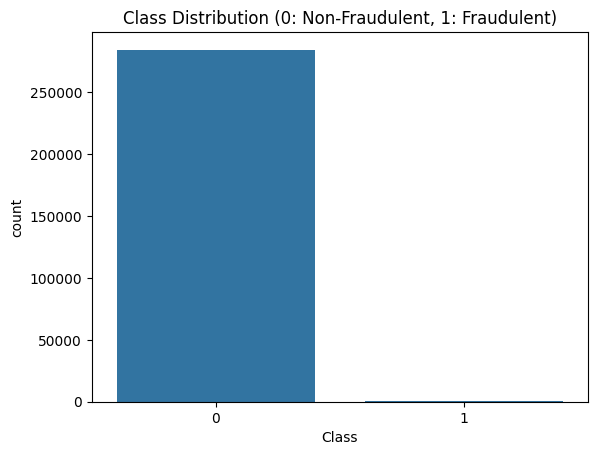

In [ ]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display the first few rows to check the data
display(df.head())

# Get information about the dataset (datatypes, non-null values)
display(df.info())

# Check for missing values
display(df.isnull().sum())

# Check the distribution of the target variable ('Class')
display(df['Class'].value_counts())

# Visualize the distribution of the target variable
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraudulent, 1: Fraudulent)')
plt.show()

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (227845, 30)
Shape of X_test: (56962, 30)
Shape of y_train: (227845,)
Shape of y_test: (56962,)


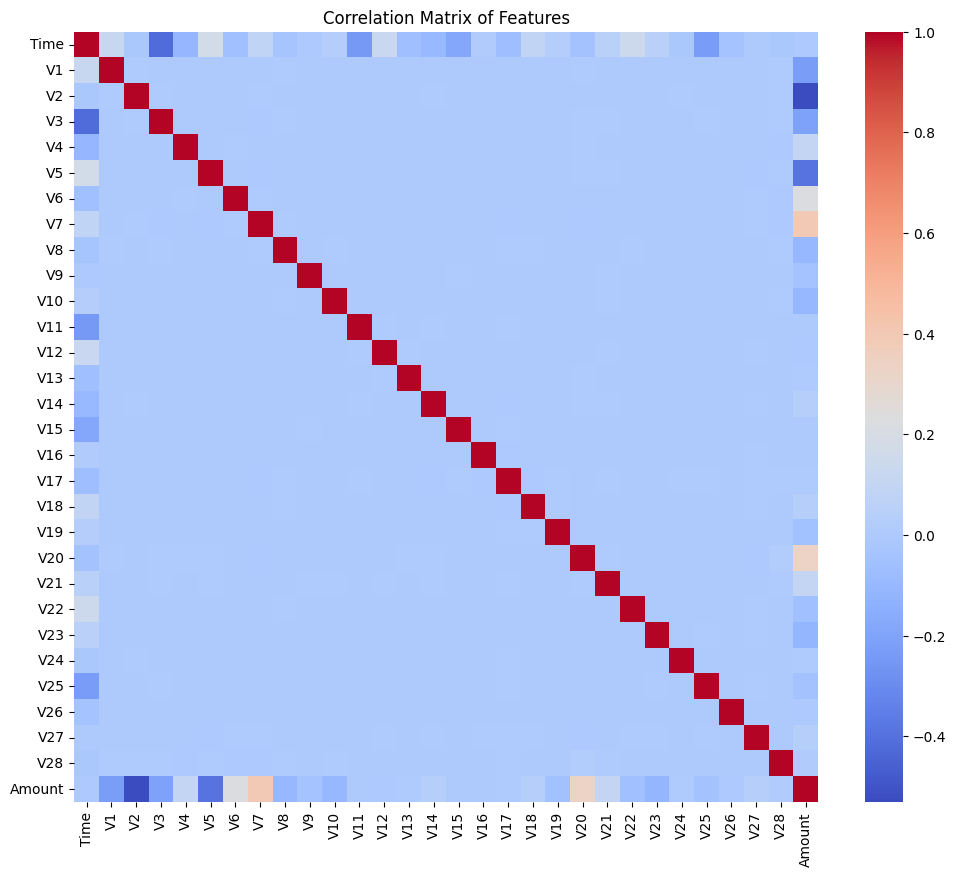

In [ ]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Train Random Forest Classifier model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate Logistic Regression
print("--- Logistic Regression Evaluation ---")
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Accuracy: {logistic_accuracy:.4f}")
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)
print("Confusion Matrix:")
display(pd.DataFrame(logistic_conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))


print("\n--- Random Forest Classifier Evaluation ---")
# Evaluate Random Forest Classifier
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print(f"Accuracy: {random_forest_accuracy:.4f}")
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)
print("Confusion Matrix:")
display(pd.DataFrame(random_forest_conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


--- Logistic Regression Evaluation ---
Accuracy: 0.9980
Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,56845,19
Actual 1,97,1



--- Random Forest Classifier Evaluation ---
Accuracy: 0.9996
Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,56859,5
Actual 1,18,80


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate additional metrics for Logistic Regression
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)
logistic_roc_auc = roc_auc_score(y_test, logistic_predictions)

print("--- Logistic Regression Metrics ---")
print(f"Accuracy: {logistic_accuracy:.4f}")
print(f"Precision: {logistic_precision:.4f}")
print(f"Recall: {logistic_recall:.4f}")
print(f"F1-Score: {logistic_f1:.4f}")
print(f"ROC-AUC Score: {logistic_roc_auc:.4f}")

# Calculate additional metrics for Random Forest Classifier
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_predictions)

print("\n--- Random Forest Classifier Metrics ---")
print(f"Accuracy: {random_forest_accuracy:.4f}")
print(f"Precision: {random_forest_precision:.4f}")
print(f"Recall: {random_forest_recall:.4f}")
print(f"F1-Score: {random_forest_f1:.4f}")
print(f"ROC-AUC Score: {random_forest_roc_auc:.4f}")

--- Logistic Regression Metrics ---
Accuracy: 0.9980
Precision: 0.0500
Recall: 0.0102
F1-Score: 0.0169
ROC-AUC Score: 0.5049

--- Random Forest Classifier Metrics ---
Accuracy: 0.9996
Precision: 0.9412
Recall: 0.8163
F1-Score: 0.8743
ROC-AUC Score: 0.9081


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Address Class Imbalance using SMOTE on the training data
# Note: Apply SMOTE only to the training data to avoid data leakage
print("Original training dataset shape %s" % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Resampled training dataset shape %s" % Counter(y_train_res))

Original training dataset shape Counter({0: 227451, 1: 394})
Resampled training dataset shape Counter({0: 227451, 1: 227451})


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

# Define a parameter distribution for Randomized Search
# We'll focus on key hyperparameters for Random Forest
param_dist = {
    'n_estimators': randint(100, 500), # Number of trees
    'max_depth': randint(10, 50),     # Maximum depth of trees
    'min_samples_split': randint(2, 20), # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 20),  # Minimum samples required at a leaf node
    'bootstrap': [True, False]         # Whether bootstrap samples are used
}

# Initialize a new Random Forest model for tuning
rf_tune = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
# cv=5 for 5-fold cross-validation
# n_iter=50 is the number of parameter settings that are sampled (reduced for faster execution)
# scoring='recall' is chosen as it's often important for imbalanced datasets
random_search_balanced = RandomizedSearchCV(
    estimator=rf_tune,
    param_distributions=param_dist,
    n_iter=50, # Reduced number of parameter combinations to sample for faster execution
    cv=5,       # Number of cross-validation folds
    scoring='recall', # Use recall as the primary scoring metric for tuning
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Perform the randomized search on the SMOTE-balanced training data
# Note: This will still take some time to run, but less than with n_iter=100
print("Performing Randomized Search for Hyperparameter Tuning on balanced data (reduced iterations)...")
random_search_balanced.fit(X_train_res, y_train_res)

# Print the best parameters and the best score found
print("\nBest parameters found by Randomized Search on balanced data:")
print(random_search_balanced.best_params_)
print(f"\nBest cross-validation score (recall) on balanced data: {random_search_balanced.best_score_:.4f}")

# Store the best estimator
tuned_random_forest_model_balanced_tuned = random_search_balanced.best_estimator_

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline for Logistic Regression with scaling, trained on balanced data
logistic_model_balanced = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000)) # Increased max_iter for convergence
])

# Train the Logistic Regression model on the SMOTE-balanced training data
print("Retraining Logistic Regression model on balanced data...")
logistic_model_balanced.fit(X_train_res, y_train_res)

# Evaluate the model on the original (unbalanced) test set
print("\nEvaluating Logistic Regression model on original test data after training on balanced data...")
balanced_lr_predictions = logistic_model_balanced.predict(X_test)

print("--- Balanced Logistic Regression Evaluation (on original test set) ---")
balanced_lr_accuracy = accuracy_score(y_test, balanced_lr_predictions)
balanced_lr_precision = precision_score(y_test, balanced_lr_predictions)
balanced_lr_recall = recall_score(y_test, balanced_lr_predictions)
balanced_lr_f1 = f1_score(y_test, balanced_lr_predictions)
balanced_lr_roc_auc = roc_auc_score(y_test, balanced_lr_predictions)


print(f"Accuracy: {balanced_lr_accuracy:.4f}")
print(f"Precision: {balanced_lr_precision:.4f}")
print(f"Recall: {balanced_lr_recall:.4f}")
print(f"F1-Score: {balanced_lr_f1:.4f}")
print(f"ROC-AUC Score: {balanced_lr_roc_auc:.4f}")

print("\nConfusion Matrix:")
balanced_lr_conf_matrix = confusion_matrix(y_test, balanced_lr_predictions)
display(pd.DataFrame(balanced_lr_conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

Retraining Logistic Regression model on balanced data...

Evaluating Logistic Regression model on original test data after training on balanced data...
--- Balanced Logistic Regression Evaluation (on original test set) ---
Accuracy: 0.9899
Precision: 0.1341
Recall: 0.8980
F1-Score: 0.2334
ROC-AUC Score: 0.9440

Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,56296,568
Actual 1,10,88


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the original test set using the tuned Random Forest model trained on balanced data
balanced_tuned_rf_predictions = tuned_random_forest_model_balanced_tuned.predict(X_test)

# Evaluate the tuned Random Forest model trained on balanced data
print("--- Tuned Random Forest Classifier Evaluation (on original test set after training on balanced data) ---")
balanced_tuned_rf_accuracy = accuracy_score(y_test, balanced_tuned_rf_predictions)
balanced_tuned_rf_precision = precision_score(y_test, balanced_tuned_rf_predictions)
balanced_tuned_rf_recall = recall_score(y_test, balanced_tuned_rf_predictions)
balanced_tuned_rf_f1 = f1_score(y_test, balanced_tuned_rf_predictions)
balanced_tuned_rf_roc_auc = roc_auc_score(y_test, balanced_tuned_rf_predictions)

print(f"Accuracy: {balanced_tuned_rf_accuracy:.4f}")
print(f"Precision: {balanced_tuned_rf_precision:.4f}")
print(f"Recall: {balanced_tuned_rf_recall:.4f}")
print(f"F1-Score: {balanced_tuned_rf_f1:.4f}")
print(f"ROC-AUC Score: {balanced_tuned_rf_roc_auc:.4f}")

print("\nConfusion Matrix:")
balanced_tuned_rf_conf_matrix = confusion_matrix(y_test, balanced_tuned_rf_predictions)
display(pd.DataFrame(balanced_tuned_rf_conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

NameError: name 'tuned_random_forest_model_balanced_tuned' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define the number of folds for cross-validation
n_splits = 5  # You can adjust the number of folds

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

print("--- Cross-Validation on Original Data ---")

# Perform cross-validation for Initial Logistic Regression model (trained on original data)
# Using the pipeline with scaling for consistency with training
logistic_pipeline_initial = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])
logistic_cv_scores_initial = cross_val_score(logistic_pipeline_initial, X, y, cv=kf, scoring='recall') # Using recall as scoring

print(f"Initial Logistic Regression CV Recall Scores ({n_splits} folds):")
print(logistic_cv_scores_initial)
print(f"Mean CV Recall: {logistic_cv_scores_initial.mean():.4f}")

# Perform cross-validation for Initial Random Forest Classifier model (trained on original data)
random_forest_cv_scores_initial = cross_val_score(random_forest_model, X, y, cv=kf, scoring='recall') # Using recall as scoring

print(f"\nInitial Random Forest Classifier CV Recall Scores ({n_splits} folds):")
print(random_forest_cv_scores_initial)
print(f"Mean CV Recall: {random_forest_cv_scores_initial.mean():.4f}")


print("\n--- Cross-Validation on SMOTE-Balanced Data ---")

# Perform cross-validation for Logistic Regression model trained on Balanced Data
# Using the pipeline with scaling
logistic_pipeline_balanced = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])
# Note: Ideally, SMOTE should be part of the pipeline for CV on original data.
# For demonstration, we perform CV on the already balanced training data.
logistic_cv_scores_balanced = cross_val_score(logistic_pipeline_balanced, X_train_res, y_train_res, cv=kf, scoring='recall')

print(f"Balanced Logistic Regression CV Recall Scores ({n_splits} folds):")
print(logistic_cv_scores_balanced)
print(f"Mean CV Recall: {logistic_cv_scores_balanced.mean():.4f}")

# Perform cross-validation for Tuned Random Forest model trained on Balanced Data
# Note: Ideally, SMOTE and Tuning should be part of the pipeline for CV on original data.
# For demonstration, we perform CV on the already balanced training data using the tuned model structure.
# Reinitialize the tuned model structure for CV
tuned_rf_balanced_for_cv = RandomForestClassifier(**random_search_balanced.best_params_, random_state=42)

random_forest_cv_scores_balanced = cross_val_score(tuned_rf_balanced_for_cv, X_train_res, y_train_res, cv=kf, scoring='recall')

print(f"\nBalanced and Tuned Random Forest Classifier CV Recall Scores ({n_splits} folds):")
print(random_forest_cv_scores_balanced)
print(f"Mean CV Recall: {random_forest_cv_scores_balanced.mean():.4f}")